# Определение перспективного тарифа для телеком-компании
Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

План:
1) Изучение данных из файлов
2) Подготовка данных
3) Анализ данных
4) Проверка гипотез
5) Общие выводы

Задачи:
1) Привести данные к нужным типам и найти и исправить ошибки в данных, если они есть.
2) Посчитать для каждого пользователя:
    количество сделанных звонков и израсходованных минут разговора по месяцам;
    количество отправленных сообщений по месяцам;
    объем израсходованного интернет-трафика по месяцам;
    помесячную выручку с каждого пользователя
3) Описание поведение клиентов, исходя из выборок и расчётов
4) Проверка гипотез:
    средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
    средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

## Изучение данных из файла


In [1]:
# импорт библиотеки pandas
import pandas as pd

In [2]:
from scipy import stats as st

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn

In [6]:
import math

In [7]:
import numpy as np

In [8]:
# чтение файлов с данными и сохранение
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tarrifs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [9]:
tbl_list = [calls, internet, messages, tarrifs, users]

In [10]:
date_list = [calls['call_date'], internet['session_date'], messages['message_date'], users['reg_date']]

In [11]:
# получение первых 10 строк таблиц
for i in tbl_list:
    print(i.head(10))

       id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000
3  1000_3  2018-09-21     13.80     1000
4  1000_4  2018-12-15      5.18     1000
5  1000_5  2018-11-02      0.00     1000
6  1000_6  2018-10-18      0.00     1000
7  1000_7  2018-08-22     18.31     1000
8  1000_8  2018-09-15     18.44     1000
9  1000_9  2018-08-15      0.00     1000
   Unnamed: 0      id  mb_used session_date  user_id
0           0  1000_0   112.95   2018-11-25     1000
1           1  1000_1  1052.81   2018-09-07     1000
2           2  1000_2  1197.26   2018-06-25     1000
3           3  1000_3   550.27   2018-08-22     1000
4           4  1000_4   302.56   2018-09-24     1000
5           5  1000_5   399.97   2018-10-02     1000
6           6  1000_6   540.08   2018-09-07     1000
7           7  1000_7   415.70   2018-07-11     1000
8           8  1000_8   505.40   2018-10-08     1000
9           9  1000

In [12]:
# получение информации о таблицах
for i in tbl_list:
    print(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (

In [13]:
for i in tbl_list:
    print(i.columns)

Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')
Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')
Index(['id', 'message_date', 'user_id'], dtype='object')
Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')
Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')


Таблица users (информация о пользователях):</br>
user_id — уникальный идентификатор пользователя </br>
first_name — имя пользователя</br>
last_name — фамилия пользователя</br>
age — возраст пользователя (годы)</br>
reg_date — дата подключения тарифа (день, месяц, год)</br>
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)</br>
city — город проживания пользователя</br>
tariff — название тарифного плана</br>
Таблица calls (информация о звонках):</br>
id — уникальный номер звонка</br>
call_date — дата звонка</br>
duration — длительность звонка в минутах</br>
user_id — идентификатор пользователя, сделавшего звонок</br>
Таблица messages (информация о сообщениях):</br>
id — уникальный номер сообщения</br>
message_date — дата сообщения</br>
user_id — идентификатор пользователя, отправившего сообщение</br>
Таблица internet (информация об интернет-сессиях):</br>
id — уникальный номер сессии</br>
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)</br>
session_date — дата интернет-сессии</br>
user_id — идентификатор пользователя</br>
Таблица tariffs (информация о тарифах):</br>
tariff_name — название тарифа</br>
rub_monthly_fee — ежемесячная абонентская плата в рублях</br>
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату</br>
messages_included — количество сообщений в месяц, включённых в абонентскую плату</br>
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)</br>
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)</br>
rub_per_message — стоимость отправки сообщения сверх тарифного пакета</br>
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)</br>

<AxesSubplot:>

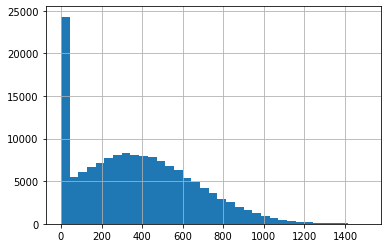

In [14]:
internet['mb_used'].hist(bins = 35, range = (0,1500))

<AxesSubplot:>

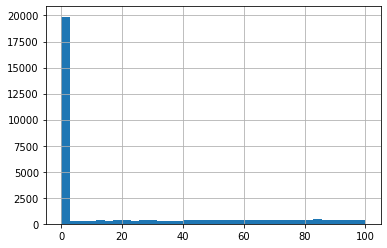

In [15]:
internet['mb_used'].hist(bins = 35, range = (0,100))

In [16]:
len(calls['user_id'].unique())

492

In [17]:
len(messages['user_id'].unique())

426

In [18]:
len(internet['user_id'].unique())

497

### Вывод

Нужно перевести даты в формат datetime. В таблице internet лишний столбец unnamed:0. В столбце duration из таблицы calls данные указаны в минутах, но есть строки, где дробная часть больше 60. Согласно примечанию нужно окргулить данные в столбце duration из таблицы calls до минут и в столбце mb_used до гигабайт. Много нулевых значений в интернет трафике. 8 абонентов не совершали звонков, 74 не отправляли сообщения, 3 не пользовались интернетом.

## Подготовка данных

In [19]:
# Удаление столбца unnamed:0
del internet['Unnamed: 0']

In [20]:
# Функция для подсчета пропущенных значений в таблицах 
def df_nul(df):
    for i in df:
        print(i.isna().sum())
df_nul(tbl_list)

id           0
call_date    0
duration     0
user_id      0
dtype: int64
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64
id              0
message_date    0
user_id         0
dtype: int64
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64
user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64


38 Абонентов прекратили пользоваться своим тарифом

In [21]:
# Проверка столбцов
def col_chk(col):
    for i in col:
        for j in i:
            display(i[j].value_counts())
col_chk(tbl_list)

1168_1597    1
1299_543     1
1196_1075    1
1078_440     1
1130_477     1
            ..
1227_792     1
1118_569     1
1461_36      1
1021_781     1
1312_340     1
Name: id, Length: 202607, dtype: int64

2018-12-31    1435
2018-12-29    1202
2018-12-30    1192
2018-12-22    1158
2018-12-26    1149
              ... 
2018-01-05      20
2018-01-07      18
2018-01-02       9
2018-01-03       7
2018-01-01       5
Name: call_date, Length: 365, dtype: int64

0.00     39613
5.50       142
4.49       142
6.15       141
6.38       141
         ...  
26.32        1
24.51        1
27.24        1
29.89        1
27.43        1
Name: duration, Length: 2871, dtype: int64

1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
        ... 
1397      33
1442      28
1373      24
1016      20
1257      14
Name: user_id, Length: 492, dtype: int64

1469_175    1
1315_225    1
1032_460    1
1053_69     1
1119_294    1
           ..
1057_35     1
1447_184    1
1331_135    1
1045_94     1
1045_197    1
Name: id, Length: 149396, dtype: int64

0.00      19598
335.91        9
447.30        9
197.56        9
199.11        8
          ...  
182.69        1
726.03        1
315.12        1
898.99        1
677.66        1
Name: mb_used, Length: 70003, dtype: int64

2018-12-31    1057
2018-12-30     903
2018-12-25     859
2018-12-26     844
2018-12-22     834
              ... 
2018-01-05      14
2018-01-04       9
2018-01-03       6
2018-01-01       3
2018-01-02       3
Name: session_date, Length: 365, dtype: int64

1496    834
1227    812
1204    789
1240    764
1251    759
       ... 
1151     35
1467     27
1343     26
1192     22
1399      8
Name: user_id, Length: 497, dtype: int64

1082_189    1
1482_172    1
1288_112    1
1274_595    1
1134_594    1
           ..
1282_645    1
1353_227    1
1288_70     1
1100_149    1
1045_197    1
Name: id, Length: 123036, dtype: int64

2018-12-31    859
2018-12-30    765
2018-12-21    712
2018-12-29    702
2018-12-26    699
             ... 
2018-01-11     12
2018-01-05     10
2018-01-04     10
2018-01-02     10
2018-01-03      4
Name: message_date, Length: 364, dtype: int64

1277    1463
1089    1408
1231    1384
1385    1380
1356    1224
        ... 
1111       6
1279       5
1074       3
1159       2
1141       1
Name: user_id, Length: 426, dtype: int64

1000    1
50      1
Name: messages_included, dtype: int64

15360    1
30720    1
Name: mb_per_month_included, dtype: int64

500     1
3000    1
Name: minutes_included, dtype: int64

1950    1
550     1
Name: rub_monthly_fee, dtype: int64

200    1
150    1
Name: rub_per_gb, dtype: int64

1    1
3    1
Name: rub_per_message, dtype: int64

1    1
3    1
Name: rub_per_minute, dtype: int64

ultra    1
smart    1
Name: tariff_name, dtype: int64

1024    1
1353    1
1366    1
1365    1
1364    1
       ..
1185    1
1184    1
1183    1
1182    1
1023    1
Name: user_id, Length: 500, dtype: int64

53    14
42    14
63    13
64    13
71    13
21    12
40    12
73    12
29    11
39    11
37    11
47    11
26    11
41    10
45    10
58    10
36    10
70    10
52    10
65     9
66     9
56     9
68     9
20     9
51     9
50     9
48     9
30     9
19     9
24     9
28     9
27     9
23     9
62     8
60     8
55     8
69     8
44     8
25     7
31     7
35     7
67     7
74     7
43     7
32     7
46     7
18     6
59     6
54     6
75     6
38     5
34     5
72     5
33     5
22     5
57     4
49     4
61     3
Name: age, dtype: int64

2018-12-03    2
2018-12-09    2
2018-10-03    2
2018-10-14    2
2018-12-21    2
2018-10-05    1
2018-10-04    1
2018-12-14    1
2018-11-07    1
2018-10-28    1
2018-12-26    1
2018-12-20    1
2018-09-02    1
2018-11-22    1
2018-08-31    1
2018-11-30    1
2018-12-24    1
2018-09-27    1
2018-10-25    1
2018-11-26    1
2018-12-30    1
2018-11-21    1
2018-12-18    1
2018-10-27    1
2018-08-17    1
2018-12-16    1
2018-11-16    1
2018-09-26    1
2018-11-27    1
2018-12-23    1
2018-12-11    1
2018-12-25    1
2018-11-13    1
Name: churn_date, dtype: int64

Москва             99
Санкт-Петербург    39
Новосибирск        16
Омск               14
Казань             14
                   ..
Иваново             1
Архангельск         1
Подольск            1
Нижневартовск       1
Химки               1
Name: city, Length: 76, dtype: int64

Радим       6
Леонид      5
Пётр        5
Руслан      4
Алиса       4
           ..
Ангелина    1
Людмила     1
Илья        1
Инга        1
Дебора      1
Name: first_name, Length: 246, dtype: int64

Андреенко     5
Аничкина      3
Березина      3
Абашкина      3
Булгаков      3
             ..
Кулагина      1
Авдонюшкин    1
Акимчин       1
Сухарева      1
Нечаева       1
Name: last_name, Length: 419, dtype: int64

2018-05-28    8
2018-11-16    5
2018-04-03    5
2018-01-04    5
2018-07-16    5
             ..
2018-05-14    1
2018-01-20    1
2018-11-18    1
2018-04-28    1
2018-06-04    1
Name: reg_date, Length: 270, dtype: int64

smart    351
ultra    149
Name: tariff, dtype: int64

Количество абонентов на начало года тарифа смарт: 351, ультра: 149

#### Преобразование типов данных

In [22]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')

In [23]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

In [24]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')

In [25]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')

In [26]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')

In [27]:
#округлим значения времени звонков вверх
calls['duration'] = np.ceil(calls['duration']).astype('int')

In [28]:
# Функция для подсчета дубликатов в таблицах 
def df_dup(dup):
    for i in dup:
        print(i.duplicated().sum())
df_dup(tbl_list)

0
0
0
0
0


In [29]:
#создадим доп столбец с месяцем
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

In [30]:
#создадим доп столбец с месяцем
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

In [31]:
#создадим доп столбец с месяцем
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [32]:
#округлим значения мегабайт до гигабайтов
#internet['gb_used'] = internet['mb_used']/1024
#internet['gb_used'] = np.ceil(internet['gb_used']).astype('int')

In [33]:
#Корректируем название столбца с тарифом для корректного слияния:
tarrifs.rename(columns={'tariff_name': 'tariff'}, inplace=True)

In [34]:
# Добавим столбец с лимитом трафика в ГБ на месяц
tarrifs['gb_per_month_included'] = (tarrifs['mb_per_month_included']/1024).astype('int')
tarrifs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15
1,1000,30720,3000,1950,150,1,1,ultra,30


#### Расчеты

In [35]:
# функция создания сводной таблицы - количества ресурсов по месяцам 
def month_amount(data_in, column_values, func):
    data_out = data_in.pivot_table(index = ["user_id", 'month'], values = column_values, aggfunc = func)
    data_out.reset_index(inplace = True)
    return data_out

In [36]:
#Количество звонков за месяц
calls_made = month_amount(calls, 'duration', 'count')
calls_made.rename(columns={'duration': 'duration_count'}, inplace=True)
calls_made

,user_id,month,duration_count
0,1000,5,22
1,1000,6,43
2,1000,7,47
3,1000,8,52
4,1000,9,58
...,...,...,...
3169,1498,10,41
3170,1499,9,9
3171,1499,10,68
3172,1499,11,74


In [37]:
#Количество израсходованных минут за месяц
spent_minutes = month_amount(calls, 'duration', 'sum')
spent_minutes

,user_id,month,duration
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466
...,...,...,...
3169,1498,10,247
3170,1499,9,70
3171,1499,10,449
3172,1499,11,612


In [38]:
#Количество отправленных сообщений за месяц
messages_made = month_amount(messages, 'id', 'count')
messages_made.rename(columns={'id': 'count_msg'}, inplace=True)
messages_made

,user_id,month,count_msg
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [39]:
#Объём трафика за месяц
traffic_made = month_amount(internet, 'mb_used', 'sum')
#округлим значения мегабайт до гигабайтов
traffic_made['gb_used'] = traffic_made['mb_used']/1024
traffic_made['gb_used'] = np.ceil(traffic_made['gb_used']).astype('int')
traffic_made

,user_id,month,mb_used,gb_used
0,1000,5,2253.49,3
1,1000,6,23233.77,23
2,1000,7,14003.64,14
3,1000,8,14055.93,14
4,1000,9,14568.91,15
...,...,...,...,...
3198,1498,10,20579.36,21
3199,1499,9,1845.75,2
3200,1499,10,17788.51,18
3201,1499,11,17963.31,18


In [40]:
# Соберём таблицу со всеми данными
data = traffic_made.merge(messages_made, 
                          on = ['user_id', 'month'], 
                          how = 'outer').merge(spent_minutes, 
                                              on = ['user_id', 'month'], 
                                              how = 'outer').merge(calls_made,
                                                                  on = ['user_id', 'month'], how = 'outer').merge(users, on = 'user_id', how = 'outer').merge(tarrifs, 
                                                                                                                     on = 'tariff')
data

,user_id,month,mb_used,gb_used,count_msg,duration,duration_count,age,churn_date,city,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,5.0,2253.49,3.0,22.0,159.0,22.0,52,NaT,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30
1,1000,6.0,23233.77,23.0,60.0,172.0,43.0,52,NaT,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30
2,1000,7.0,14003.64,14.0,75.0,340.0,47.0,52,NaT,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30
3,1000,8.0,14055.93,14.0,81.0,408.0,52.0,52,NaT,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30
4,1000,9.0,14568.91,15.0,57.0,466.0,58.0,52,NaT,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1499,9.0,1845.75,2.0,11.0,70.0,9.0,35,NaT,Пермь,...,2018-09-27,smart,50,15360,500,550,200,3,3,15
3212,1499,10.0,17788.51,18.0,48.0,449.0,68.0,35,NaT,Пермь,...,2018-09-27,smart,50,15360,500,550,200,3,3,15
3213,1499,11.0,17963.31,18.0,59.0,612.0,74.0,35,NaT,Пермь,...,2018-09-27,smart,50,15360,500,550,200,3,3,15
3214,1499,12.0,13055.58,13.0,66.0,492.0,69.0,35,NaT,Пермь,...,2018-09-27,smart,50,15360,500,550,200,3,3,15


In [41]:
# Проверим полученную таблицу
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3216 non-null   int64         
 1   month                  3214 non-null   float64       
 2   mb_used                3203 non-null   float64       
 3   gb_used                3203 non-null   float64       
 4   count_msg              2717 non-null   float64       
 5   duration               3174 non-null   float64       
 6   duration_count         3174 non-null   float64       
 7   age                    3216 non-null   int64         
 8   churn_date             189 non-null    datetime64[ns]
 9   city                   3216 non-null   object        
 10  first_name             3216 non-null   object        
 11  last_name              3216 non-null   object        
 12  reg_date               3216 non-null   datetime64[ns]
 13  tar

Видно, что есть пропущенные значения в столбце month, gb_used_ mb_used, count_msg, duration, duration_count. Их можно заполнить 0, т.к. пропуск = что действие не совершалось.

In [42]:
#Рассмотрим пропуски в столбце месяц
data[data['month'].isna()]

,user_id,month,mb_used,gb_used,count_msg,duration,duration_count,age,churn_date,city,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
985,1128,NaN,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,...,2018-12-15,ultra,1000,30720,3000,1950,150,1,1,30
3215,1371,NaN,NaN,NaN,NaN,NaN,NaN,50,2018-12-30,Омск,...,2018-12-25,smart,50,15360,500,550,200,3,3,15


Видно, что два абонента не пользовались услугами оператора. Они подключили тарифы в декабре и в том же месяце прекратили пользоваться оператором

In [43]:
#Рассмотрим пропуски в столбце месяц
data['month'] = data['month'].fillna(12)

In [44]:
#Заполним пропуски в таблице 0
data = data.fillna(0)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3216 non-null   int64         
 1   month                  3216 non-null   float64       
 2   mb_used                3216 non-null   float64       
 3   gb_used                3216 non-null   float64       
 4   count_msg              3216 non-null   float64       
 5   duration               3216 non-null   float64       
 6   duration_count         3216 non-null   float64       
 7   age                    3216 non-null   int64         
 8   churn_date             3216 non-null   object        
 9   city                   3216 non-null   object        
 10  first_name             3216 non-null   object        
 11  last_name              3216 non-null   object        
 12  reg_date               3216 non-null   datetime64[ns]
 13  tar

In [46]:
#Пересчитаем по формуле ((бесплатны лимит - потраченный) * цену единицы) и добавим столбцы с прибылью сверх тарифа по звонкам, сообщениям и интернету
data['calls_revenue'] = ((data['duration'] - data['minutes_included']) * data['rub_per_minute'])
data['messages_revenue'] = ((data['count_msg'] - data['messages_included']) * data['rub_per_message'])
data['gb_revenue'] = ((data['gb_used'] - data['gb_per_month_included']) * data['rub_per_gb'])

In [47]:
#Для верного подсчёта прибыли сверх тарифа, заменим отрицательные значения на 0
data['messages_revenue'] = data['messages_revenue'].clip(lower = 0)
data['calls_revenue'] = data['calls_revenue'].clip(lower = 0)
data['gb_revenue'] = data['gb_revenue'].clip(lower = 0)

In [48]:
data.isna().sum()

user_id                  0
month                    0
mb_used                  0
gb_used                  0
count_msg                0
duration                 0
duration_count           0
age                      0
churn_date               0
city                     0
first_name               0
last_name                0
reg_date                 0
tariff                   0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
gb_per_month_included    0
calls_revenue            0
messages_revenue         0
gb_revenue               0
dtype: int64

In [49]:
#Добавим новый столбец revenue, где суммируем прибыль с учетом стоимости тарифа и сверх тарифа.
data['revenue'] = data['rub_monthly_fee'] + data['calls_revenue'] + data['messages_revenue'] + data['gb_revenue']

In [50]:
data

,user_id,month,mb_used,gb_used,count_msg,duration,duration_count,age,churn_date,city,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,calls_revenue,messages_revenue,gb_revenue,revenue
0,1000,5.0,2253.49,3.0,22.0,159.0,22.0,52,0,Краснодар,...,3000,1950,150,1,1,30,0.0,0.0,0.0,1950.0
1,1000,6.0,23233.77,23.0,60.0,172.0,43.0,52,0,Краснодар,...,3000,1950,150,1,1,30,0.0,0.0,0.0,1950.0
2,1000,7.0,14003.64,14.0,75.0,340.0,47.0,52,0,Краснодар,...,3000,1950,150,1,1,30,0.0,0.0,0.0,1950.0
3,1000,8.0,14055.93,14.0,81.0,408.0,52.0,52,0,Краснодар,...,3000,1950,150,1,1,30,0.0,0.0,0.0,1950.0
4,1000,9.0,14568.91,15.0,57.0,466.0,58.0,52,0,Краснодар,...,3000,1950,150,1,1,30,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1499,9.0,1845.75,2.0,11.0,70.0,9.0,35,0,Пермь,...,500,550,200,3,3,15,0.0,0.0,0.0,550.0
3212,1499,10.0,17788.51,18.0,48.0,449.0,68.0,35,0,Пермь,...,500,550,200,3,3,15,0.0,0.0,600.0,1150.0
3213,1499,11.0,17963.31,18.0,59.0,612.0,74.0,35,0,Пермь,...,500,550,200,3,3,15,336.0,27.0,600.0,1513.0
3214,1499,12.0,13055.58,13.0,66.0,492.0,69.0,35,0,Пермь,...,500,550,200,3,3,15,0.0,48.0,0.0,598.0


In [51]:
# check
data['revenue'].sum()

4916951.0

In [52]:
# check
data[data['duration'] > 500][['user_id', 'month', 'gb_used', 'count_msg', 'duration',
        'reg_date', 'tariff', 'calls_revenue', 'messages_revenue',
       'gb_revenue', 'revenue']].tail(4)

,user_id,month,gb_used,count_msg,duration,reg_date,tariff,calls_revenue,messages_revenue,gb_revenue,revenue
3202,1496,11.0,25.0,46.0,662.0,2018-01-27,smart,486.0,0.0,2000.0,3036.0
3203,1496,12.0,21.0,51.0,518.0,2018-01-27,smart,54.0,3.0,1200.0,1807.0
3206,1497,12.0,20.0,17.0,545.0,2018-10-09,smart,135.0,0.0,1000.0,1685.0
3213,1499,11.0,18.0,59.0,612.0,2018-09-27,smart,336.0,27.0,600.0,1513.0


In [53]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3216 non-null   int64         
 1   month                  3216 non-null   float64       
 2   mb_used                3216 non-null   float64       
 3   gb_used                3216 non-null   float64       
 4   count_msg              3216 non-null   float64       
 5   duration               3216 non-null   float64       
 6   duration_count         3216 non-null   float64       
 7   age                    3216 non-null   int64         
 8   churn_date             3216 non-null   object        
 9   city                   3216 non-null   object        
 10  first_name             3216 non-null   object        
 11  last_name              3216 non-null   object        
 12  reg_date               3216 non-null   datetime64[ns]
 13  tar

## Анализ данных

In [54]:
#Сохраним в переменной total_revenue общую прибыль с каждого тарифа отдельно по звонкам/сообщениям/интернету и общую стоимость
total_revenue = data.pivot_table(index = ['tariff'], values = ['calls_revenue', 'messages_revenue', 'gb_revenue', 'revenue'], aggfunc=['sum'])

In [55]:
total_revenue

sum                                       
       calls_revenue gb_revenue messages_revenue    revenue
tariff                                                     
smart       278217.0  1332400.0          38784.0  2875901.0
ultra            0.0   118350.0              0.0  2041050.0

Как видно, из таблицы, основной доход приносит тариф Smart и он существенно больше тарифа Ultra. Основной доход тарифа смарт - превышение трафика. В тарифе ультра нет переплат за сообщения и звонки. 

In [56]:
#Сохраним в переменную sum_ultra таблицу пользователей с тарифом Ultra
sum_ultra = data[data['tariff'] == 'ultra']

In [57]:
#Сохраним в переменную sum_smart таблицу пользователей с тарифом Smart
sum_smart = data[data['tariff'] == 'smart']

Text(0.5, 0, 'Количество минут')

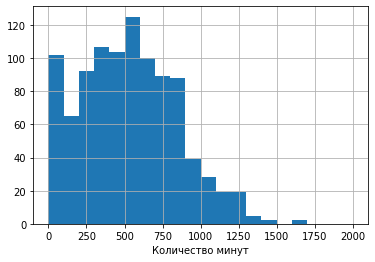

In [58]:
# Построим гистограмму с количеством минут для тарифа ультра
sum_ultra['duration'].hist(bins=20, range = (0, 2000)).set_xlabel('Количество минут')

Видим, что небольшая часть пользователей не пользуются сотовой связью, либо же используют не больше 250 минут.
Пик количества минут находится около 500-600 минут и держится до 700 минут, далее резкий спад, хвост приближается к 0 после 1250 минут. Распределение Пуассона.

Text(0.5, 0, 'Количество сообщений')

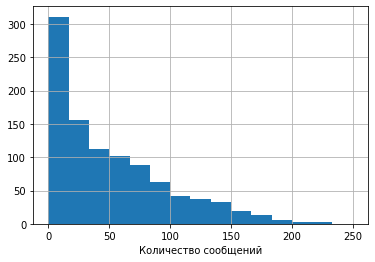

In [59]:
#Построим гистограмму с количеством сообщений для тарифа ультра
sum_ultra['count_msg'].hist(bins=15, range = (0, 250)).set_xlabel('Количество сообщений')

Видим, что очень много пользователей не отправляют сообщения, либо же отправляют не больше 15.
Те, кто пользуется отправкой сообщений отправляет около 20-50 сообщений, хвост приближается к 0 после 150 сообщений. Распределение Пуассона

Text(0.5, 0, 'Количество гб')

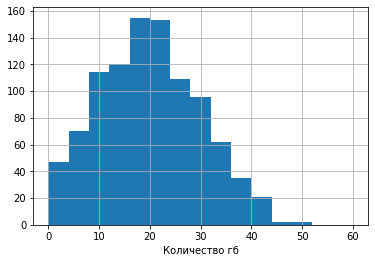

In [60]:
#Построим гистограмму с кол-ством мегабайт для тарифа
sum_ultra['gb_used'].hist(bins=15, range = (0, 60)).set_xlabel('Количество гб')

Видим, что небольшая часть пользователей не использует интернет.
Пик гигабайт приходит на 18-23 гб, хвост приближается к 0 после 40 гб. Распределение нормальное.

Text(0.5, 0, 'Количество минут')

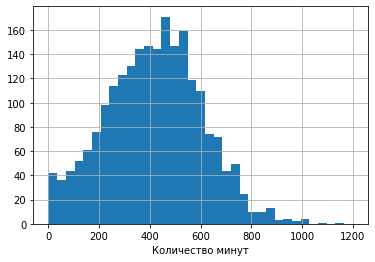

In [61]:
#Построим гистограмму с количеством минут для тарифа смарт
sum_smart['duration'].hist(bins=35, range = (0, 1200)).set_xlabel('Количество минут')

Видим, что пик затрат минут как раз приходится на лимит тарифа: 350 - 550 минут, но довольно много пользователей тратят больше лимита, доходя до 600 - 750 минут, встречаются и около 1000. Распределение нормальное.

Text(0.5, 0, 'Количество сообщений')

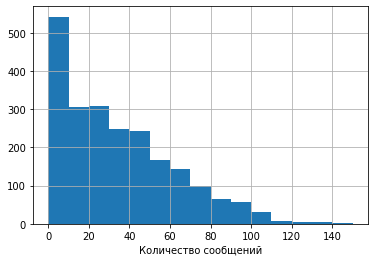

In [62]:
#Построим гистограмму с количеством сообщений для тарифа смарт
sum_smart['count_msg'].hist(bins=15, range = (0, 150)).set_xlabel('Количество сообщений')

Видим, что много пользователей не отправляют сообщения, либо отправляют не более 10-ти.
Несмотря на лимит в 50 сообщений, не мало пользователей превышают его и довольно много встречаются отправки 50-80 сообщений, есть выше 100 сообщений. Распределение Пуассона

Text(0.5, 0, 'Количество ГБ')

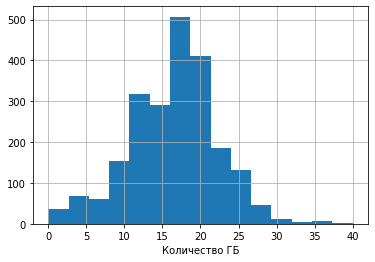

In [63]:
sum_smart['gb_used'].hist(bins=15, range = (0, 40)).set_xlabel('Количество ГБ')

Видим, что небольшая часть пользователей не пользуются интернетом, либо же используют не больше 17 гб.
Пик припадает на уровне 23 гб, но много пользователей превышают данный лимит и хвост доходит к 0 только ближе к 27 гб. Нормальное распределение

In [64]:
#Посчитаем среднее количество, дисперсию и стандартное отклонение по каждому тарифу.
variance = data.pivot_table(index = ['tariff'], values = ['duration', 'count_msg', 'gb_used'], aggfunc=['mean', 'var', 'std']).round(2)
variance

mean                        var                          std  \
       count_msg duration gb_used count_msg   duration gb_used count_msg   
tariff                                                                     
smart      33.37   417.75   16.32    796.96   36281.39   33.13     28.23   
ultra      49.31   526.09   19.47   2285.42  101052.49   97.38     47.81   

                         
       duration gb_used  
tariff                   
smart    190.48    5.76  
ultra    317.89    9.87

### Общие выводы по распределениям
Пользователи тарифа Smart часто не укладываются в лимиты, чаще всего по количеству минут и очень много по лимиту трафика.
Пользователи тарифа Ultra практически не превышают лимитов, кроме трафика.
Пользователи двух тарифов используют примерно одинаковые объемы интернета.
В двух тарифах довольно много людей либо не пользуются отправкой сообщений, либо же используют в небольших количествах до 10-15 сообщений.
Пользователи тарифа Ultra чаще всего не используют весь лимит по звонкам и сообщениям.

## Проверка гипотез

Начнём с формулировки нулевой гипотезы. H₀ всегда формулируется так, чтобы использовать знак равенства. H₀ - среднее рассматриваемой генеральной совокупности равно второй. Исходя из H₀ формулируется альтернативная гипотеза H₁. Для этой H₀ - среднее генеральной совокупности не равно второй. H0 - средняя выручка пользователей тарифов «Ультра» и «Смарт» равны. H1 - средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны.


Критический уровень статистической значимости присвоим значением 0.05.

In [65]:
smart = sum_smart['revenue']
ultra = sum_ultra['revenue']

print('cреднее Smart: ', smart.mean())
print('cреднее Ultra: ', ultra.mean())
alpha = .05 

results = st.ttest_ind(
    smart, 
    ultra)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

cреднее Smart:  1289.6417040358745
cреднее Ultra:  2070.030425963489
p-значение: 8.081909555489933e-161
Отвергаем нулевую гипотезу


Можем сказать, что выручка по двум тарифам сильно различается. Т.к. гипотеза-то наша двухсторонняя: мы не знаем, в какую сторону количество выручки отличается. Однако посчитав среднее количество выручки для обоих тарифов, с уверенностью можем сказать: cредняя выручка из тарифа Ultra выше.

### Проверка гипотезы, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Начнём с формулировки нулевой гипотезы. H₀ всегда формулируется так, чтобы использовать знак равенства. H₀ - среднее рассматриваемой генеральной совокупности равно второй. Исходя из H₀ формулируется альтернативная гипотеза H₁. Для этой H₀ - среднее генеральной совокупности не равно второй. Средние генеральных совокупностей интернет трафика почти равны. H0 - средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов. H1 - средняя выручка пользователей из Москвы не равна средней выручке пользователей из других регионов. 

Критический уровень статистической значимости присвоим значением 0.05.

In [66]:
#Сохраним moscow_tariff список пользователей из Москвы.
moscow_tariff = data[(data['city'] == 'Москва')]

In [67]:
#Сохраним other_tariff список пользователей из других регионов.
other_tariff = data[(data['city'] != 'Москва')]

In [68]:
#Проверим, отличается ли среднняя выручка по пользователям Москвы и других регионов.

moscow = moscow_tariff['revenue']
other = other_tariff['revenue']

print('Выручка по Москве: ', moscow.mean())
print('Выручка с других регионов: ', other.mean())
alpha = 0.05

results = st.ttest_ind(
    moscow, 
    other) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Выручка по Москве:  1546.7135842880523
Выручка с других регионов:  1524.7251439539348
p-значение: 0.5400751614511182
Не получилось отвергнуть нулевую гипотезу


Можем сказать, что выручка по Москве и других регионам почти не различается. Вернее, только исходя из проверки гипотезы мы не можем сказать, что больше, — только что количество выручки почти одинаково и входит в диапазон статистической значимости. Потому что гипотеза-то наша двухсторонняя: мы не знаем, в какую сторону оно отличается. Однако посчитав среднее количество выручки для Москвы и других регионов, с уверенностью можем сказать: выручка не отличается существенно.

In [69]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


In [70]:
#Сохраним moscow_tariff_ultra список пользователей из Москвы с тарифом Ультра
moscow_tariff_ultra = data[(data['city'] == 'Москва') & (data['tariff'] == 'ultra')]

In [71]:
#Сохраним other_tariff_ultra список пользователей из других регионов с тарифом Ультра
other_tariff_ultra = data[(data['city'] != 'Москва') & (data['tariff'] == 'ultra')]

In [72]:
#Проверим, отличается ли среднняя выручка по тарифу Ультра пользователей Москвы и других регионов.
moscow = moscow_tariff_ultra['revenue']
other = other_tariff_ultra['revenue']

print('Выручка по Москве тарифа Ultra: ', moscow.mean())
print('Выручка с других регионов тарифа Ultra: ', other.mean())
alpha = 0.05

results = st.ttest_ind(
    moscow, 
    other)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Выручка по Москве тарифа Ultra:  2074.0
Выручка с других регионов тарифа Ultra:  2068.856767411301
p-значение: 0.8570628563121833
Не получилось отвергнуть нулевую гипотезу


Можем сказать, что выручка по Москве и другим регионам почти не различается. Вернее, только исходя из проверки гипотезы мы не можем сказать, что больше, — только что количество выручки отличается. Потому что гипотеза-то наша двухсторонняя: мы не знаем, в какую сторону оно отличается. Однако посчитав среднее количество выручки для обоих тарифов, с уверенностью можем сказать: cредняя выручка по Москве из тарифа Ultra примерна равна.

In [73]:
#Сохраним moscow_tariff_smart список пользователей из Москвы с тарифом Смарт
moscow_tariff_smart = data[(data['city'] == 'Москва') & (data['tariff'] == 'smart')]

In [74]:
#Сохраним other_tariff_smart список пользователей из других регионов с тарифом Смарт.
other_tariff_smart = data[(data['city'] != 'Москва') & (data['tariff'] == 'smart')]

In [75]:
#Проверим, отличается ли среднняя выручка по тарифу Смарт пользователей Москвы и других регионов
moscow = moscow_tariff_smart['revenue']
other = other_tariff_smart['revenue']

print('cреднее до: ', moscow.mean())
print('cреднее после: ', other.mean())
alpha = 0.05

results = st.ttest_ind(
    moscow, 
    other)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

cреднее до:  1239.3575129533679
cреднее после:  1300.1675704989154
p-значение: 0.18439170052928663
Не получилось отвергнуть нулевую гипотезу


Можем сказать, что выручка по Москве и других регионам, по тарифу Смарт, почти не различается. Вернее, только исходя из проверки гипотезы мы не можем сказать, что больше, — только что количество выручки почти одинаково и входит в диапазон статистической значимости. Потому что гипотеза-то наша двухсторонняя: мы не знаем, в какую сторону оно отличается. Однако, посчитав среднее количество выручки для Москвы и других регионов, с уверенностью можем сказать: выручка не отличается существенно.

## Общие выводы с анализа перспективного тарифа для телеком компании
Пользователи больше предпочитают тариф Smart.
Больше всего приносит дополнительного дохода тариф Smart.
Самым прибильным сегментом является - интернет, при том в двух тарифах.
Общая прибыль больше всего у тарифа Smart.
Пользователи тарифа Smart часто не укладываются в лимиты, чаще всего по количеству минут и очень много по трафику.
Пользователи тарифа Ultra практически не превышают лимитов, кроме трафика.
Пользователи двух тарифов используют примерно одинаковые объемы интернета.
В двух тарифах довольно много людей либо не пользуются отправкой сообщений, либо же используют в небольших количествах до 10-15 сообщений.
Пользователи тарифа Ultra чаще всего не используют весь лимит по звонкам и сообщениям.
Несмотря на то, что больше прибыли приносит тариф Smart, среднняя выручка выше у ultra.
Разница в средней выручки из Москвы и других регонов - незначительная, это относится и к сравнению тарифов по Москве и регионам.
Больше денег приносит тариф Smart.
Тариф смарт лучше
Тариф ультра приносит доход в основном из-за абонентской платы, т.к. абоненты редко превышают лимит.

In [76]:
total_revenue['sum']['revenue']

tariff
smart    2875901.0
ultra    2041050.0
Name: revenue, dtype: float64

In [77]:
# check
data.columns

Index(['user_id', 'month', 'mb_used', 'gb_used', 'count_msg', 'duration',
       'duration_count', 'age', 'churn_date', 'city', 'first_name',
       'last_name', 'reg_date', 'tariff', 'messages_included',
       'mb_per_month_included', 'minutes_included', 'rub_monthly_fee',
       'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'gb_per_month_included', 'calls_revenue', 'messages_revenue',
       'gb_revenue', 'revenue'],
      dtype='object')

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

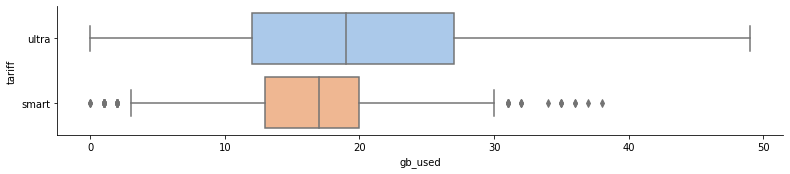

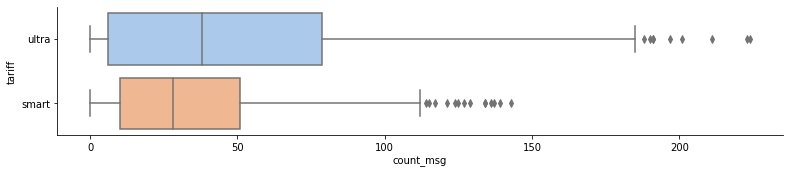

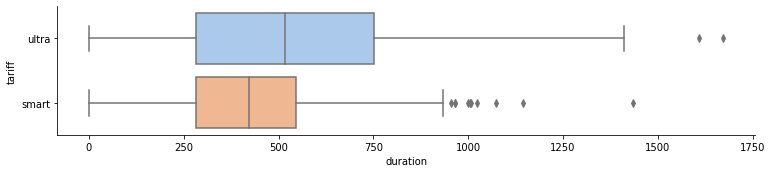

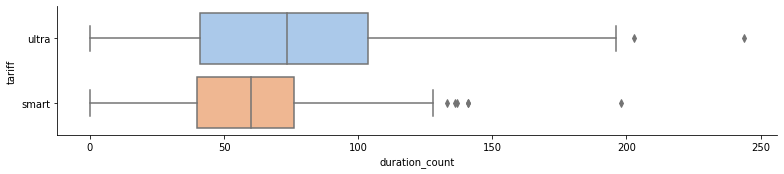

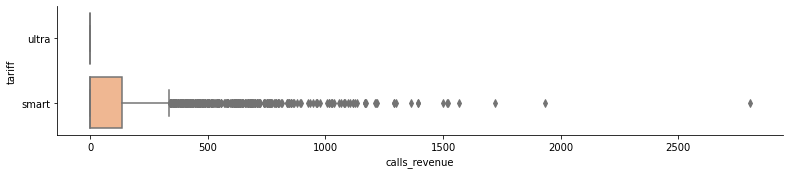

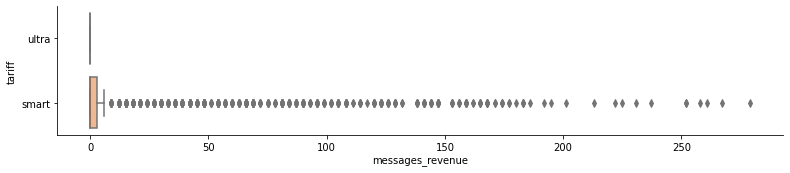

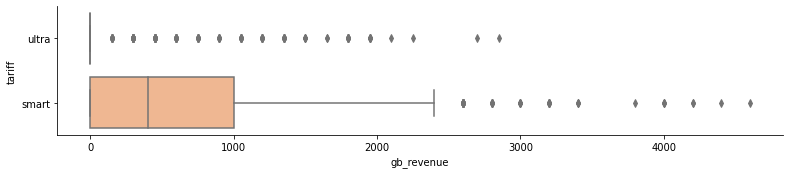

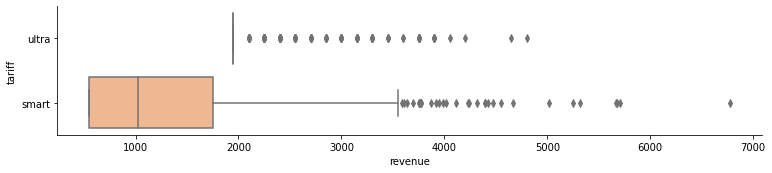

In [79]:

for column in ['gb_used', 'count_msg', 'duration',
       'duration_count', 'calls_revenue', 'messages_revenue',
       'gb_revenue', 'revenue']:    
    g = sns.catplot(y='tariff', x=column, kind="box", data= data, orient='h', palette = 'pastel')
    g.fig.set_figwidth(12)
    g.fig.set_figheight(2)

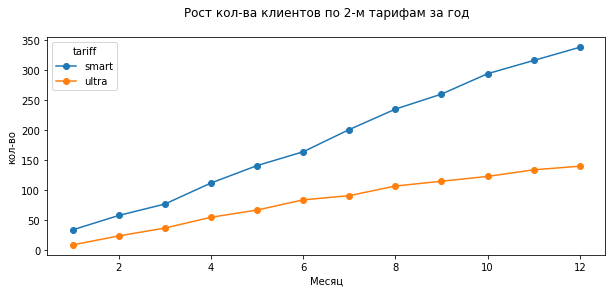

In [80]:
(data
 .pivot_table(index='tariff', columns='month', values='user_id', aggfunc='count')
 .T
 .plot(kind='line', figsize=(10,4),  style = 'o-')
)
plt.title('Рост кол-ва клиентов по 2-м тарифам за год'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('кол-во');

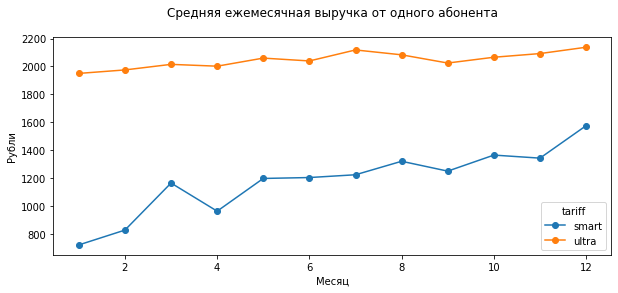

In [81]:
(data
 .pivot_table(index='tariff', columns='month', values='revenue', aggfunc='mean')
 .T
 .plot(kind='line', figsize=(10,4),  style = 'o-')
)
plt.title('Средняя ежемесячная выручка от одного абонента'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('Рубли');

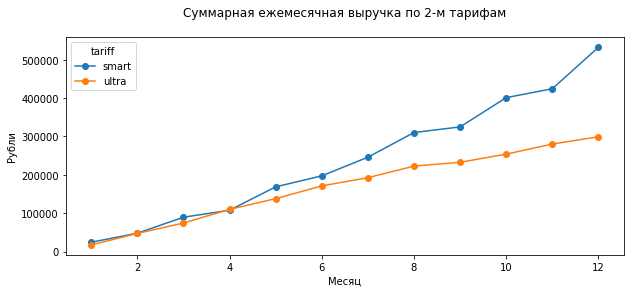

In [82]:
(data
 .pivot_table(index='tariff', columns='month', values='revenue', aggfunc='sum')
 .T
 .plot(kind='line', figsize=(10,4),  style = 'o-')
)
plt.title('Суммарная ежемесячная выручка по 2-м тарифам'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('Рубли');

In [83]:
# отток клиентов
df_users = pd.read_csv('/datasets/users.csv')

print ('Кол-во клентов покинувших компанию за год', df_users.churn_date.notna().sum())

print ('Кол-во клентов покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах',
       df_users.query('churn_date > "2018-09-25"').churn_date.notna().sum()
      )
print ('%  от общего кол-ва всех клиентов, покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах',
    (df_users.query('churn_date > "2018-09-25"').churn_date.notna().sum()/df_users.churn_date.notna().sum()*100).round(1)
)

print ('Распределение оттока клиентов на тарифах за посл. 4 мес. 2018 г.')
df_users.query('churn_date > "2018-09-25"').groupby('tariff')['churn_date'].count().to_frame()

Кол-во клентов покинувших компанию за год 38
Кол-во клентов покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах 35
%  от общего кол-ва всех клиентов, покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах 92.1
Распределение оттока клиентов на тарифах за посл. 4 мес. 2018 г.


,churn_date
tariff,
smart,22
ultra,13
